# Lab 2 - Regression - Predicting Software Reselling Profits.

Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its oﬀerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file _Tayko.csv_ contains information on 2000 purchases. Table 6.12 describes the variables to be used **(FREQ, LAST_UPDATE, WEB, GENDER, ADDRESS_RES, ADDRESS_US, SPENDING (outcome)** in the problem (the Excel file contains additional variables).

In [1]:
import pandas as pd
# load the data
tayko_df = pd.read_csv('Tayko.csv')

In [2]:
tayko_df.rename(columns = {'Web order':'Web_order'}, inplace = True)
tayko_df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web_order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [3]:
tayko_df = tayko_df.loc[:,['Freq','last_update_days_ago', 'Web_order','Gender=male','Address_is_res','US','Spending']]

In [20]:
tayko_df.head(100)

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
95,1,2548,1,0,0,1,230
96,0,2740,0,0,0,1,0
97,0,217,0,0,0,1,0
98,1,366,0,1,0,0,0


In [21]:
tayko_df.shape

(2000, 7)

In [22]:
# check data types of variables in the data
tayko_df.dtypes

Freq                    int64
last_update_days_ago    int64
Web_order               int64
Gender=male             int64
Address_is_res          int64
US                      int64
Spending                int64
dtype: object

__6.2.a__ Explore the spending amount by creating a pivot table for the categorical variables (by Gender, Address_is_res) and computing the average and standard deviation of spending in each category. 

__Answer:__ 

In [4]:
tayko_df.groupby("Web_order")["Spending"].agg(['mean','std'])


,mean,std
Web_order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [5]:
web_order_df = tayko_df.groupby("Web_order")["Spending"].agg(['mean','std'])
web_order_df.rename(columns = {'mean':'mean Spending', 'std':'std Spending'}, inplace = True)
web_order_df

,mean Spending,std Spending
Web_order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [7]:
tayko_df.groupby("Gender=male")["Spending"].agg(['mean','std'])

,mean,std
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


__6.2.b.__ Explore the relationship between spending and each of the two continuous predictors by creating two scatterplots (Spending vs. Freq, and Spending vs. last_update_days_ago. Does there seem to be a linear relationship? 

__Answer:__ 

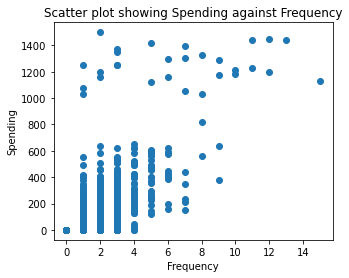

In [64]:
# plot of spending against frequency
#code here plot. remember to import required libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix, parallel_coordinates
import matplotlib.pylab as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(tayko_df.Freq, tayko_df.Spending)
fig.set_size_inches(5, 4)
plt.title('Scatter plot showing Spending against Frequency')
plt.ylabel('Spending')
plt.xlabel('Frequency')
plt.show()

The overall relationship between Spending and Freq is that there is a high correlation withe Spending cloumn and Freq column.

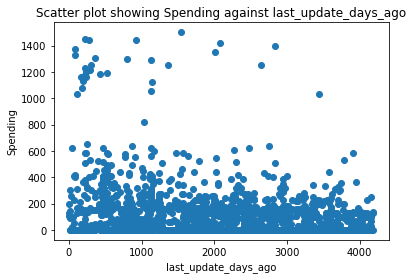

In [65]:
# plot Spending against last_update_days_ago
#scatter plot code here
fig, ax = plt.subplots()
ax.scatter(tayko_df.last_update_days_ago, tayko_df.Spending)
plt.title('Scatter plot showing Spending against last_update_days_ago')
plt.ylabel('Spending')
plt.xlabel('last_update_days_ago')
plt.show()

There appears to be no relationship between Spending and Last_Update but two grous of points similar to what we seen in case of Spending and Frequency above.

__6.2.c.__ To fit a predictive model for spending:

__6.2.c.i.__ Partition the 2000 records into training and validation sets.

__Answer:__ 

In [66]:
import seaborn as sns
import numpy as np
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
# predictors and outcome
predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender_male', 'Address_is_res']
outcome = 'Spending'
tayko_df.rename(columns = {'Gender=male':'Gender_male'}, inplace = True)
X = pd.get_dummies(tayko_df[predictors], drop_first=True)
y = tayko_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) 
# partition data
#train_test_split code here
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (1200, 6) Validation set: (800, 6)


__6.2.c.ii.__ Run a multiple linear regression model for Spending vs. all six predictors. Give the estimated predictive equation.

In [69]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #this comes from the sklearn.model_selection import

tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)

coeff_df = pd.DataFrame(tayko_lm.coef_,X.columns,columns=['Coefficient'])
# print coefficients
print('Intercept', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

Intercept 10.176297414619711
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender_male    -9.111366
5        Address_is_res   -75.815354


__Answer:__ 

The Regression equation is:

Spending = Intercept + (coeff1 * US) + ... + (coeffn * Address_is_res)

__6.2.c.iii.__ Based on this model, what type of purchaser is most likely to spend a large amount of money?

 __Answer:__
Freq

__6.2.c.vi.__ Evaluate the predictive accuracy of the model by examining its performance on the validation set.

__Answer:__



In [76]:
tayko_lm_predicted = car_lm.predict(valid_X)

(0.0, 1089.4557786392243)

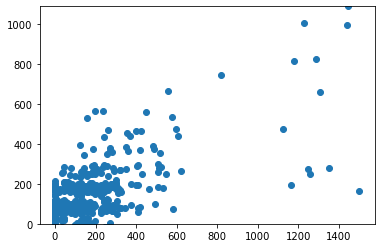

In [77]:
plt.scatter(valid_y,tayko_lm_predicted)
plt.ylim(0, max(tayko_lm_predicted))

In [78]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(valid_y, tayko_lm_predicted))
print('MSE:', metrics.mean_squared_error(valid_y, tayko_lm_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, tayko_lm_predicted)))

MAE: 83.60097261986095
MSE: 18697.73569089126
RMSE: 136.73966392708175


In [79]:
tayko_lm_pred = tayko_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': tayko_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - tayko_lm_pred})
print(result.head(5))

       Predicted  Actual    Residual
674    89.214915       0  -89.214915
1699  202.231362     184  -18.231362
1282   49.159303       0  -49.159303
1315  824.841659    1289  464.158341
1210    0.121196       0   -0.121196


In [80]:
# Compute common accuracy measures
regressionSummary(valid_y, tayko_lm_pred)


Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


__6.2.c.vii.__ Create a histogram of the model residuals. Do they appear to follow a normal distribution? How does this aﬀect the predictive performance of the model?

__Answer:__ 

1.0


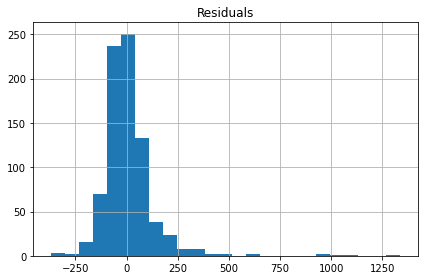

In [81]:
tayko_lm_pred = tayko_lm.predict(valid_X)
all_residuals = valid_y - tayko_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

A: It is not a normal distribution. The distribution is positively sckewed. 
One of the big problems with non-normality in the residuals and heteroscedasticity is that the amount of error in my model is not consistent across the full range of your observed data. 